<a href="https://colab.research.google.com/github/StevTobs/image_processing/blob/main/yolo8_pole_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initialize

- Use T4-GPU runtime

In [1]:
!nvidia-smi

Mon Sep 11 17:34:02 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

from ultralytics import YOLO
from IPython.display import display, Image

# Mount Google Drive if you need to access images from your Google Drive
from google.colab import drive
drive.mount('/content/drive')

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/166.8 GB disk)


Mounted at /content/drive


In [ ]:
# !gdown --folder https://drive.google.com/drive/folders/1ctXh2d3qYsF3kxY5O7PvyM_BY8P914V6?usp=sharing

In [4]:
%cd /content/drive/MyDrive/Innovation-Projects/Git/image_processing/YOLO_pole_detection

/content/drive/MyDrive/Innovation-Projects/Git/image_processing/YOLO_pole_detection


In [ ]:
!ls

datasets  data.yaml  note.gdoc	Yolo8-pole-detection.ipynb  yolov8s.pt


# Fitting

In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data=data.yaml epochs=15 plots=True
# from ultralytics import YOLO

# model = YOLO('yolov8n.yaml')
# results = model.train(data='data.yaml', epochs=10)

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=data.yaml, epochs=15, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=1

In [ ]:
!ls /content/drive/MyDrive/Innovation-Projects/Git/image_processing/YOLO_pole_detection/runs/detect/train

args.yaml					    train_batch0.jpg
confusion_matrix.png				    train_batch10.jpg
events.out.tfevents.1693418769.2fb093cc9313.3930.0  train_batch11.jpg
F1_curve.png					    train_batch12.jpg
P_curve.png					    train_batch1.jpg
PR_curve.png					    train_batch2.jpg
R_curve.png					    val_batch0_labels.jpg
results.csv					    val_batch0_pred.jpg
results.png					    weights


In [ ]:
path_res = "/content/drive/MyDrive/Innovation-Projects/Git/image_processing/YOLO_pole_detection/runs/detect/train/"

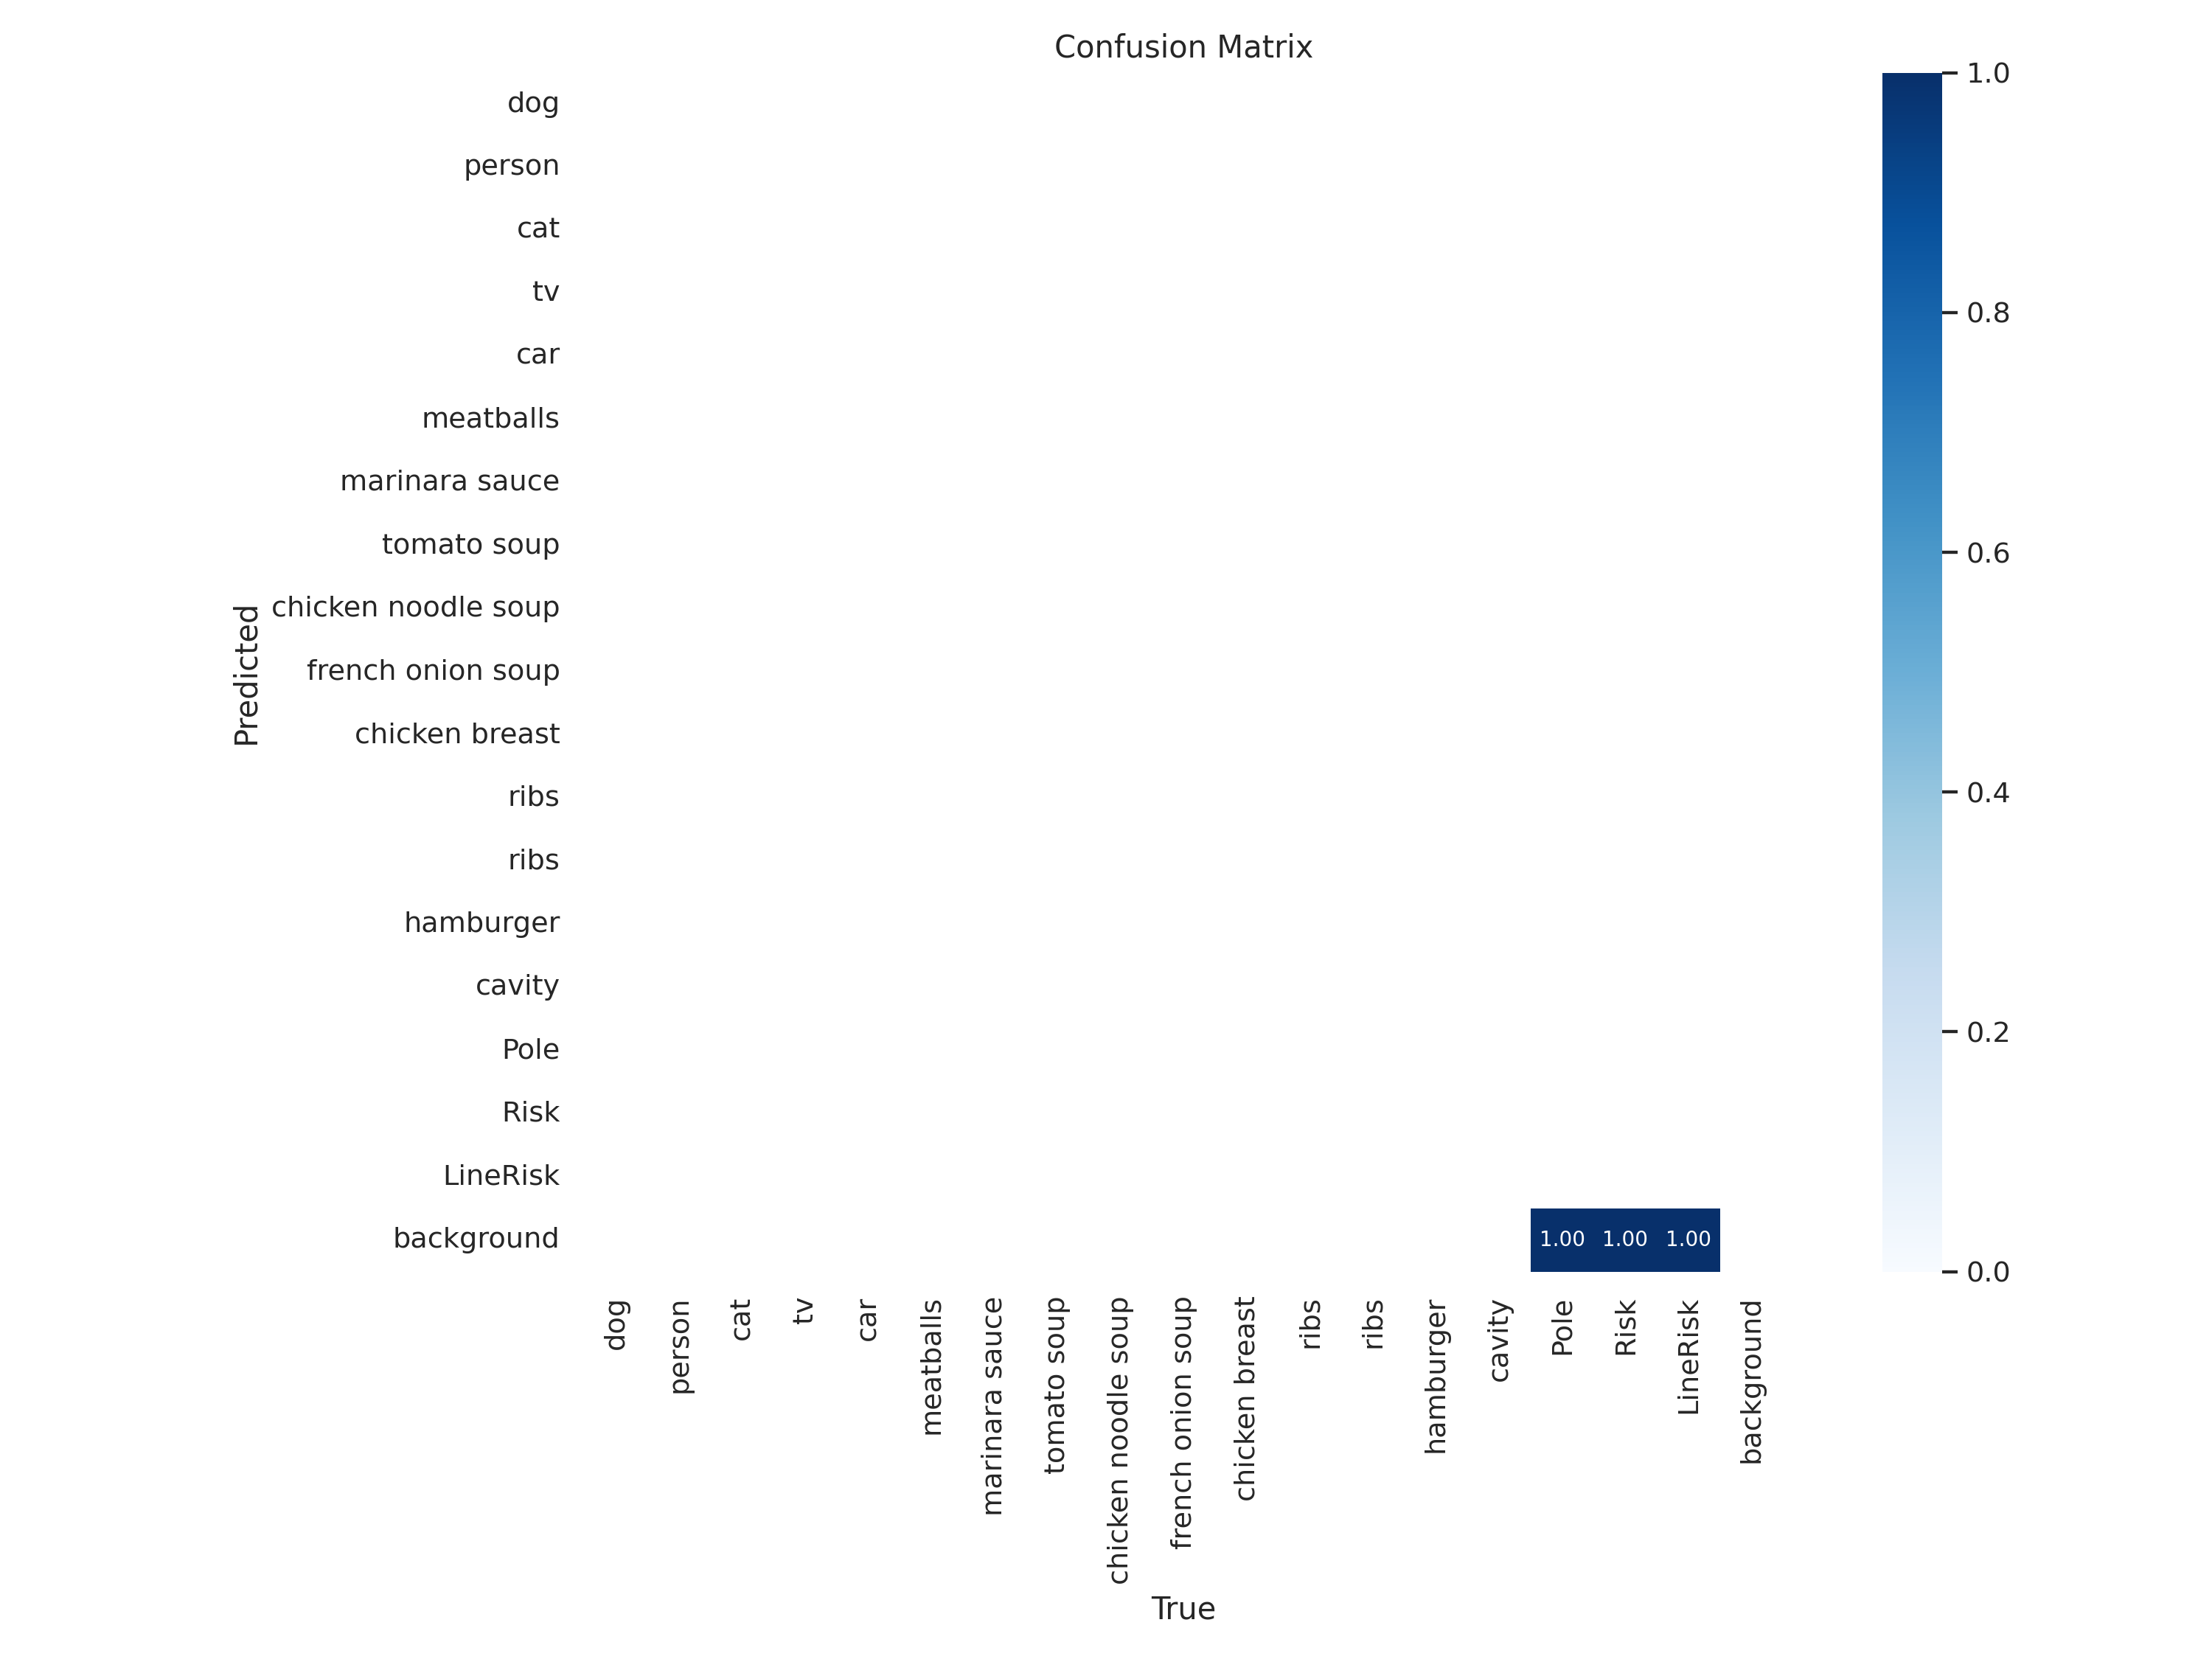

In [ ]:
Image(filename= path_res  +'confusion_matrix.png',width = 800)

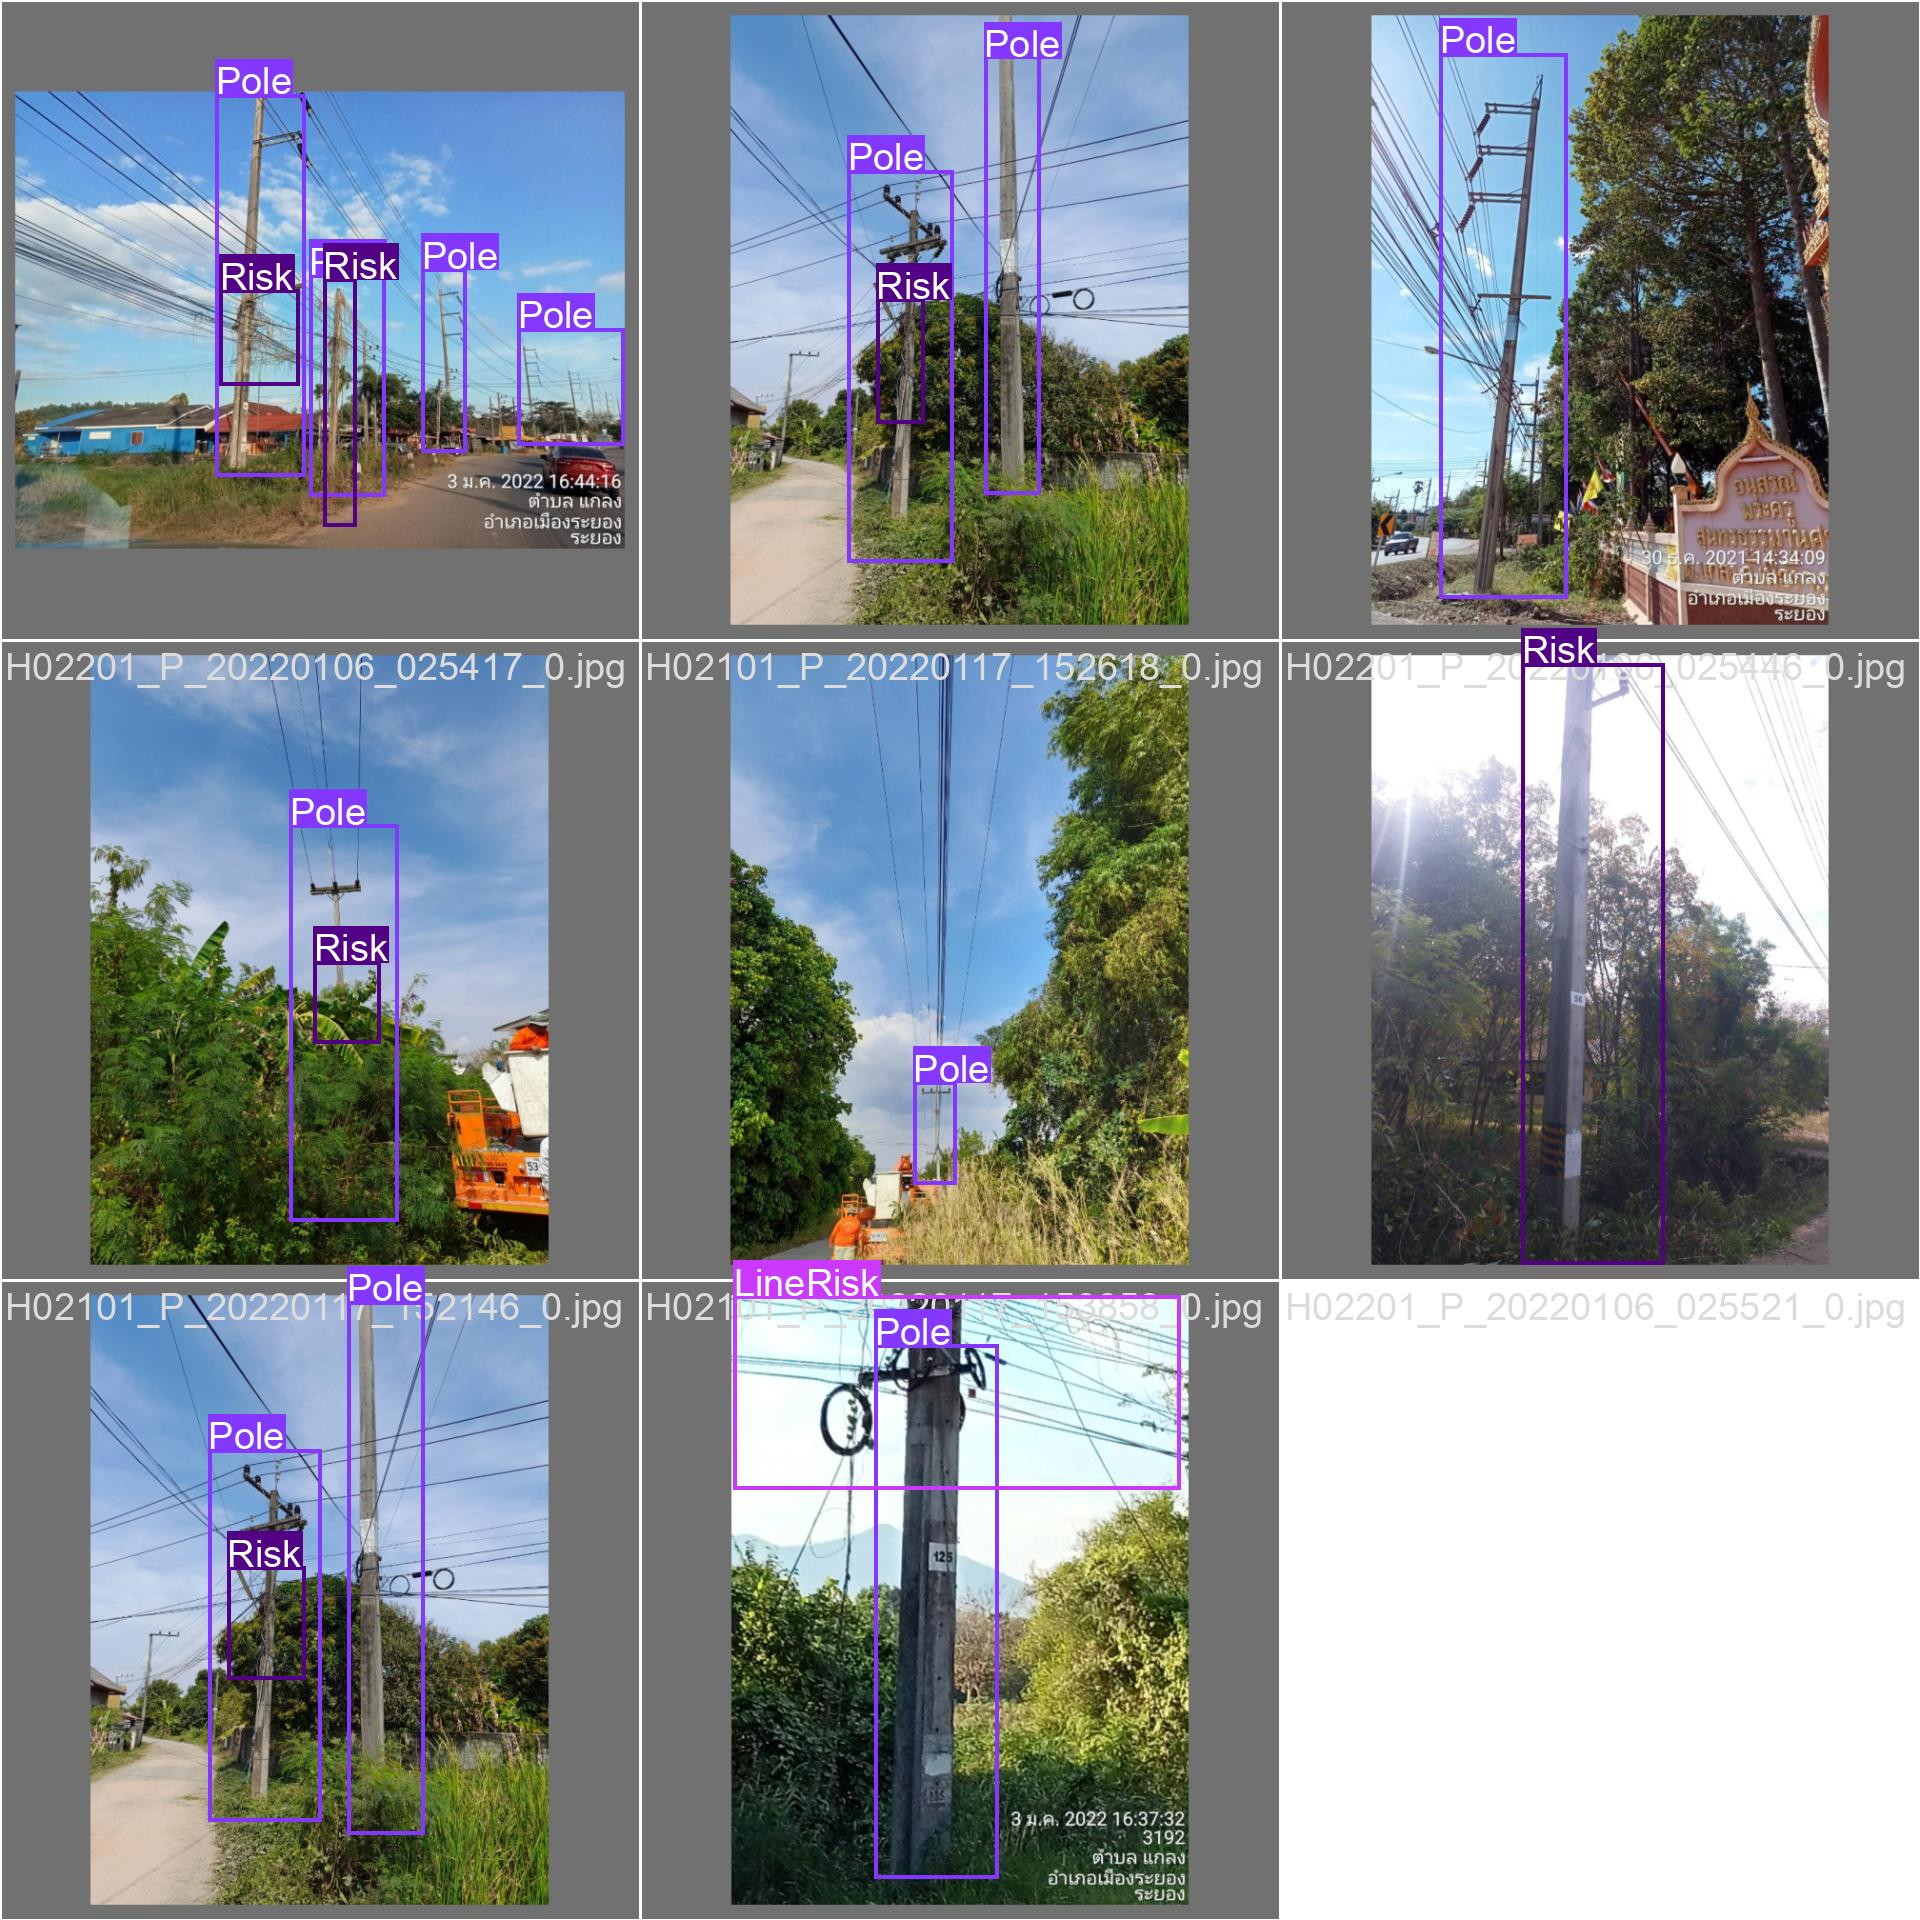

In [ ]:
Image(filename= path_res  +'val_batch0_labels.jpg',width = 800)

# Validate Custom Model

In [ ]:
!ls

datasets  data.yaml  note.gdoc	runs  Yolo8-pole-detection.ipynb  yolov8s.pt


In [ ]:
import os
# Set the locale environment variable to UTF-8
os.environ['LC_ALL'] = 'en_US.UTF-8'
os.environ['LANG'] = 'en_US.UTF-8'

%cd /content/drive/MyDrive/Innovation-Projects/Git/image_processing/YOLO_pole_detection/

/content/drive/MyDrive/Innovation-Projects/Git/image_processing/YOLO_pole_detection


In [ ]:
!ls

datasets  data.yaml  note.gdoc	runs  Yolo8-pole-detection.ipynb  yolov8s.pt


In [ ]:
%cd /content/drive/MyDrive/Innovation-Projects/Git/image_processing/YOLO_pole_detection

!yolo task=detect mode=val model=yolov8s.pt data=data.yaml


/content/drive/MyDrive/Innovation-Projects/Git/image_processing/YOLO_pole_detection
2023-08-30 18:11:00.887297: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-30 18:11:02.358361: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
YOLOv8s summary (fused): 168 layers, 11156544 parameters, 0 gradients, 28.6 GFLOPs
val: Scanning /content/drive/MyDrive/Innovation-Projects/Git/image_processing/YOLO_pole_detection/datasets/data/valid/labels.cache... 8 images, 0 backgrounds, 0 corrupt: 100% 8/8 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00

# Inference with Custom Model

In [ ]:
from ultralytics import YOLO
from PIL import Image
import cv2
import os

folder_path = "/content/drive/MyDrive/Innovation-Projects/Git/image_processing/YOLO_pole_detection/datasets/data/test/images/"
file_list = []

# List all files in the folder
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    if os.path.isfile(file_path):
        file_list.append(file_path)

print(file_list)

model = YOLO("/content/drive/MyDrive/Innovation-Projects/Git/image_processing/YOLO_pole_detection/runs/detect/train/weights/best.pt")



# accepts all formats - image/dir/Path/URL/video/PIL/ndarray. 0 for webcam
results = model.predict(source=file_list[0])
# results = model.predict(source=file_list[0], show=True, save=True) # Display preds. Accepts all YOLO predict arguments

# # # from PIL
# im1 = Image.open("source=file_list[0]")
# results = model.predict(source=im1, save=True)  # save plotted images

# # # from ndarray
# im2 = cv2.imread("source=file_list[0]")
# results = model.predict(source=im2, save=True, save_txt=True)  # save predictions as labels

# # from list of PIL/ndarray
# results = model.predict(source=[im1, im2])

['/content/drive/MyDrive/Innovation-Projects/Git/image_processing/YOLO_pole_detection/datasets/data/test/images/H03101_P_20220106_133553_0.jpg', '/content/drive/MyDrive/Innovation-Projects/Git/image_processing/YOLO_pole_detection/datasets/data/test/images/H03101_P_20220106_134011_0.jpg', '/content/drive/MyDrive/Innovation-Projects/Git/image_processing/YOLO_pole_detection/datasets/data/test/images/H03101_P_20220106_133810_0.jpg', '/content/drive/MyDrive/Innovation-Projects/Git/image_processing/YOLO_pole_detection/datasets/data/test/images/H03101_P_20220106_134411_0.jpg', '/content/drive/MyDrive/Innovation-Projects/Git/image_processing/YOLO_pole_detection/datasets/data/test/images/H03101_P_20220106_134207_0.jpg']


Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 168 layers, 11132550 parameters, 0 gradients, 28.5 GFLOPs


In [ ]:

print(file_list)

['/content/drive/MyDrive/Innovation-Projects/Git/image_processing/YOLO_pole_detection/datasets/data/test/images/H03101_P_20220106_133553_0.jpg', '/content/drive/MyDrive/Innovation-Projects/Git/image_processing/YOLO_pole_detection/datasets/data/test/images/H03101_P_20220106_134011_0.jpg', '/content/drive/MyDrive/Innovation-Projects/Git/image_processing/YOLO_pole_detection/datasets/data/test/images/H03101_P_20220106_133810_0.jpg', '/content/drive/MyDrive/Innovation-Projects/Git/image_processing/YOLO_pole_detection/datasets/data/test/images/H03101_P_20220106_134411_0.jpg', '/content/drive/MyDrive/Innovation-Projects/Git/image_processing/YOLO_pole_detection/datasets/data/test/images/H03101_P_20220106_134207_0.jpg']


In [ ]:
%cd /content/drive/MyDrive/Innovation-Projects/Git/image_processing/YOLO_pole_detection/
for img in file_list:
  model.predict(source=img,  project="/content/drive/MyDrive/Innovation-Projects/Git/image_processing/YOLO_pole_detection/", save=True)

Results saved to runs/detect/predict
Results saved to runs/detect/predict


/content/drive/MyDrive/Innovation-Projects/Git/image_processing/YOLO_pole_detection


Results saved to runs/detect/predict
Results saved to runs/detect/predict
Results saved to runs/detect/predict


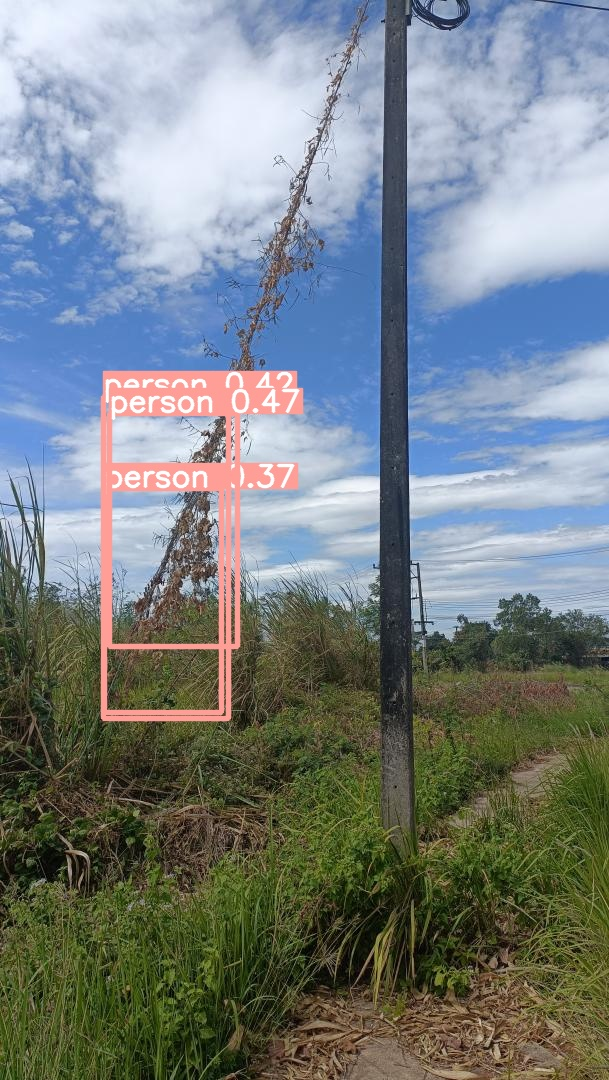

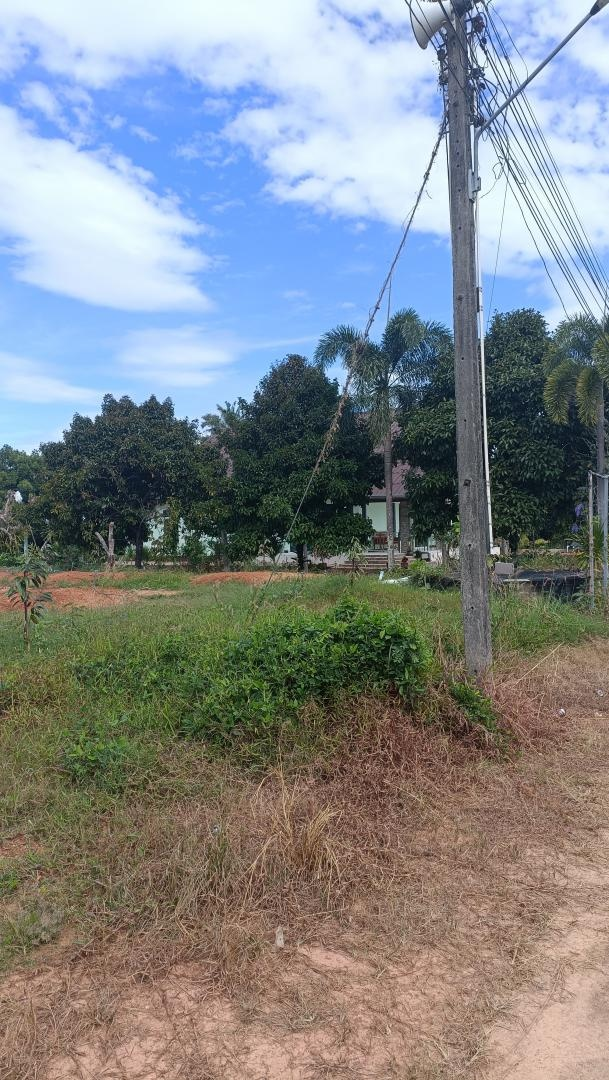

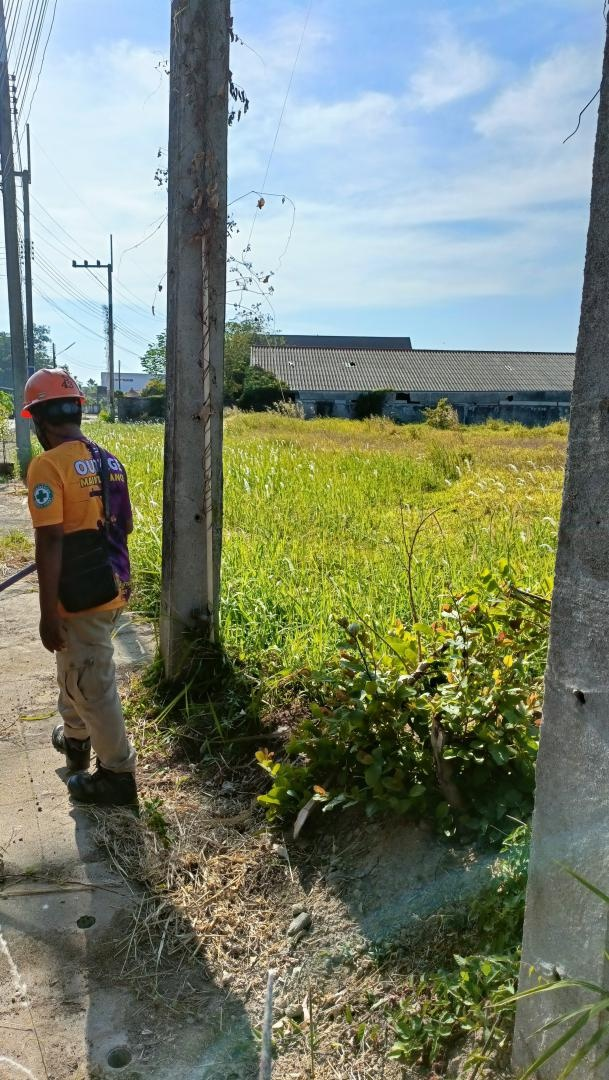

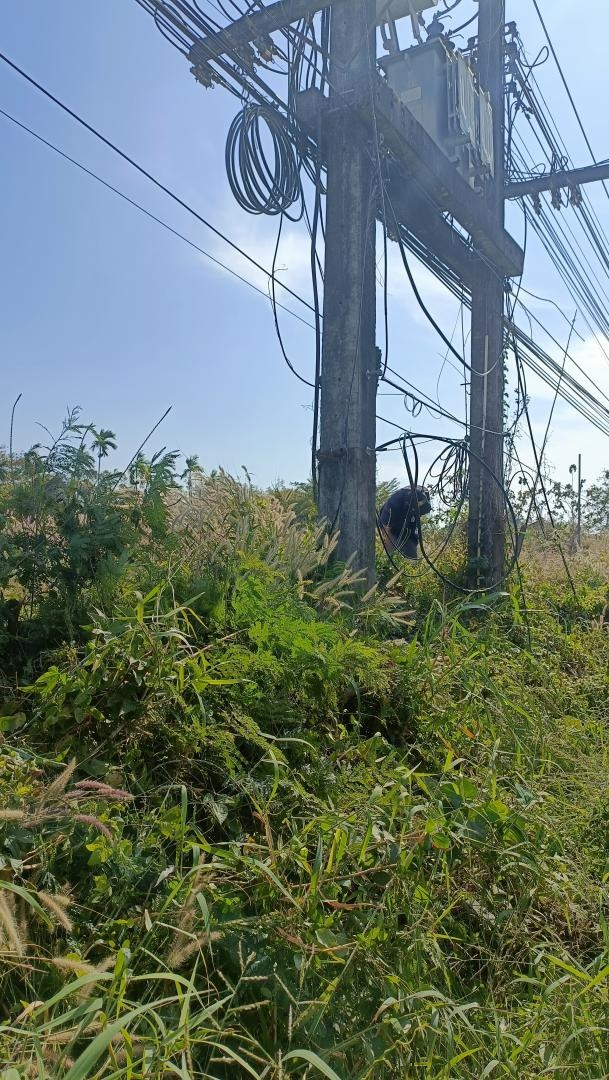

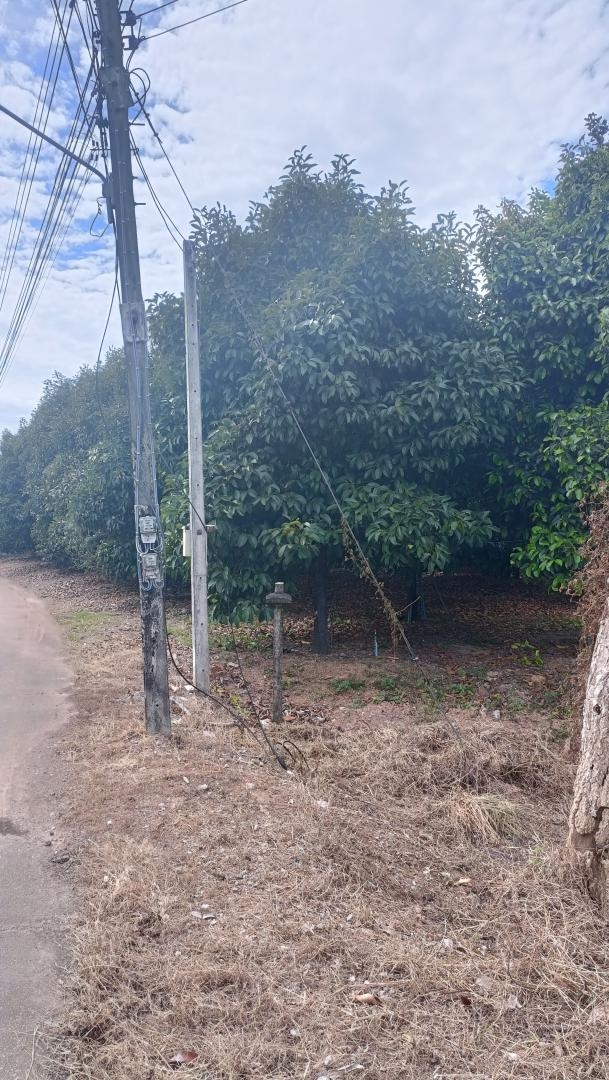

In [ ]:
import glob
from IPython.display import Image, display

folder_path = "/content/drive/MyDrive/Innovation-Projects/Git/image_processing/YOLO_pole_detection/runs/detect/predict/"

for image_path in glob.glob(folder_path + '*.jpg'):
    display(Image(filename=image_path, width=300))
